# IS833: The Analytic Enterprise
### Team Dangerous Bar: 
#### Mike Goodridge, John Power, Sid Shandilya, Andrew Yellis & Dongbo Zhang

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from geopy.geocoders import Nominatim

import pylab as pl
import seaborn as sns

mpl.style.use('fivethirtyeight')
%matplotlib inline

## Crime Data, Cleaning & Analysis

In [2]:
crime = pd.read_csv('https://raw.githubusercontent.com/jjpowe13/Drunk_Crimes/master/Drunk_Crime_Reports.csv')
crime = crime.drop(crime.columns[3:21], axis=1)
crime = crime.drop(crime.columns[0:2], axis=1)
crime = crime[crime.Latitude_Fixed != 0]
crime = crime.reset_index(drop=True)
crime['Zip'] = ''

In [3]:
def findzip(x,y):
    geolocator = Nominatim()
    location = [x, y]
    location = str(location)
    location = location.strip('[]')
    location = geolocator.reverse(location)
    location = str(location.raw)
    location = location.split(',')
    zip = location[7].strip()
    return zip

In [7]:
test = crime.head(5)
test = test.reset_index(drop=True)
test['Zip'] = ''

In [8]:
for i in test.index:
    test.ix[i, 'Zip'] = findzip(test.Latitude_Fixed[i], test.Longitude_Fixed[i])
print test

  INCIDENT_TYPE_DESCRIPTION  Latitude_Fixed  Longitude_Fixed    Zip
0                DISORDERLY       42.314001        -71.08634  02121
1                DISORDERLY       42.288621        -71.07558  02124
2                DISORDERLY       42.251951        -71.12532  02136
3                DISORDERLY       42.328021        -71.09237  02119
4                DISORDERLY       42.306752        -71.06028  02122


### The loop against the full data set does run, but due to rate limits cannot be applied as many times as we'd like. After running it successfully we appended the results to a new CSV, and pull it in below.

In [10]:
#for i in crime.index:
#    crime.ix[i, 'Zip'] = findzip(crime.Latitude_Fixed[i], crime.Longitude_Fixed[i])
# print crime.sample(5)

In [9]:
crime = pd.read_csv('https://raw.githubusercontent.com/jjpowe13/Drunk_Crimes/master/Drunk_Crime_Reports2.csv')
crime = crime.drop(crime.columns[3:22], axis=1)
crime = crime.drop(crime.columns[0:2], axis=1)
crime.rename(columns = {'postcode':'Zip'}, inplace = True)

Next step - set the 'geolocate' function to be able to read in the data frame...

## Liquor License Information

In [30]:
liquor = pd.read_csv('https://raw.githubusercontent.com/jjpowe13/Drunk_Crimes/master/Liquor_License_Data.csv')
liquor = liquor.drop(liquor.columns[3:21], axis=1)
liquor = liquor.drop(liquor.columns[4:9], axis=1)
liquor = liquor.reset_index(drop=True)
liquor.rename(columns = {'ZIP':'Zip'}, inplace = True)

In [31]:
totalpivot = pd.pivot_table(liquor,index=['Zip'], values=['LICENSENO'], aggfunc = lambda x: len(x.unique()))

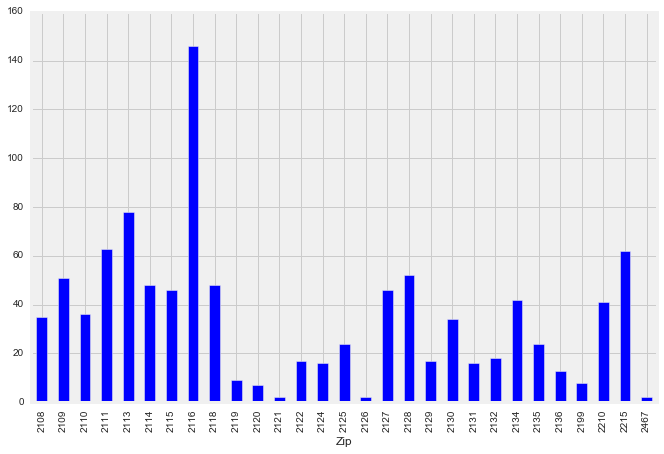

In [32]:
totalpivot.LICENSENO.plot(kind='bar', figsize=(10,7))